In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

##Dataset Info:

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Link: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [30]:
cols=['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']


In [31]:
dp=pd.read_csv('SeoulBikeData.csv').drop(["Date","Holiday","Seasons"],axis=1)#axis=1 means to drop it from the columns

In [32]:
dp.head()

,Rented Bike Count,Hour,Temperature(),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [33]:
dp.columns=cols

giving numerial 0 and 1 values to No and Yes respectively.

only using data of specific hour of day at 12

In [34]:

dp['functional']=(dp['functional']=='Yes').astype(int)
dp=dp[dp['hour']==12]
dp=dp.drop(['hour'],axis=1)

In [39]:
dp.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
for label in dp.columns[1:]:
   #will give temp and onwards not bike count, beacuse we are seeing how these each indiviually affect the bike count
   plt.scatter(dp[label],dp['bike_count'])
   plt.title(label)
   plt.ylabel('bike count at 12 noon')
   plt.xlabel(label)
   plt.show()






In [38]:
dp=dp.drop(['wind','visibility','functional'],axis=1)

##Train, validation, test dataset split

In [42]:
train, val, test=np.split(dp.sample(frac=1),[int(0.6*len(dp)),int(0.8*len(dp))])

In [44]:
print(len(train),len(val),len(test))

219 73 73


In [73]:
def get_xy(dataframe, y_label, x_label=None):

  dataframe= copy.deepcopy(dataframe) #making a copy of datafarme

  if x_label is None:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_label)==1:
      x=dataframe[x_label[0]].values.reshape(-1,1) #need to make it 2d with reshape[-1,1]
    else:
      x=dataframe[x_label].values

  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y)) #horizontally stacking nxt to each other

  return data, x, y


In [74]:
_, x_train_temp, y_train_temp =get_xy(train, 'bike_count',x_label=["temp"])

_, x_val_temp, y_val_temp =get_xy(val, 'bike_count',x_label=['temp'])

_, x_test_temp, y_test_temp =get_xy(test, 'bike_count',x_label=['temp'])

#simple Linear regression for Temperature

In [75]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)




LinearRegression()

coefficient(m) and y intercept

In [76]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.41418787]] [370.97855087]


R^2 score

In [77]:
temp_reg.score(x_test_temp,y_test_temp)

0.32916533604735787

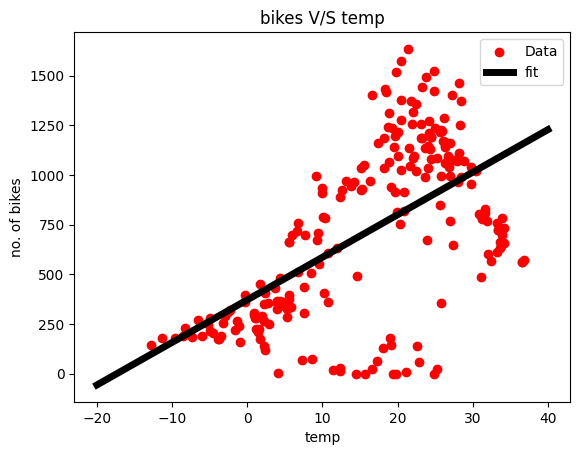

In [78]:
plt.scatter(x_train_temp,y_train_temp, label='Data',color='red')
x=tf.linspace(-20,40,100)  # x data ranges fro -20 to 40 and 100 data pts between them are taken
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='fit', color='black', linewidth=5) #x is in 1-d we have to convert it into 2d by- np.array(x).reshape(-1,1)
plt.legend()
plt.title('bikes V/S temp')
plt.ylabel('no. of bikes')
plt.xlabel('temp')
plt.show()

#Multiple Linear Regression

In [86]:
train, val, test=np.split(dp.sample(frac=1),[int(0.6*len(dp)),int(0.8*len(dp))])
_, x_train_all, y_train_all =get_xy(train, 'bike_count',x_label=dp.columns[1:])

_, x_val_all, y_val_all =get_xy(val, 'bike_count',x_label=dp.columns[1:])

_, x_test_all, y_test_all =get_xy(test, 'bike_count',x_label=dp.columns[1:])

In [87]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

R^2 for multiple linear regression

In [89]:
all_reg.score(x_test_all,y_test_all)

0.4642087905558262

In [157]:
y_pred_lin_reg=all_reg.predict(x_test_all)

array([[ 304.82143339],
       [ 740.55812226],
       [ 872.16274817],
       [ 460.23222133],
       [ 230.86220047],
       [1154.25818567],
       [ 903.96938166],
       [ 418.601962  ],
       [ 997.11635279],
       [ 593.03535959],
       [1048.08341431],
       [ 715.3859127 ],
       [ 658.0244911 ],
       [ 993.46217609],
       [ 795.51499832],
       [ 319.27625863],
       [ 342.15415226],
       [ 937.7907019 ],
       [1041.20328165],
       [ 694.35287157],
       [1097.78523851],
       [ 986.42996049],
       [ 842.00815575],
       [ 779.21844885],
       [ 470.84059913],
       [ 178.59304977],
       [1090.18803156],
       [ 508.86054834],
       [ 760.64359429],
       [ 814.10881896],
       [ 463.30912055],
       [ 721.60864498],
       [ 692.11547572],
       [ 511.88279683],
       [ 380.82397738],
       [ 835.42098306],
       [1085.79199337],
       [1020.36500919],
       [ 832.97766313],
       [ 812.18352726],
       [1059.34958814],
       [1022.898

#Regression with Neural Net and single node

normalizing the data with tensorflow

In [114]:
temp_nomralizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_nomralizer.adapt(x_train_temp.reshape(-1))


In [115]:
temp_nn_model=tf.keras.Sequential([
    temp_nomralizer,
    tf.keras.layers.Dense(1)  #one single node it's linear, no activation function the output is also linear
])

In [116]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')


In [117]:
history=temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
)

In [118]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch') #epoch is no. of training cycles
  plt.ylabel('mean squared error (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

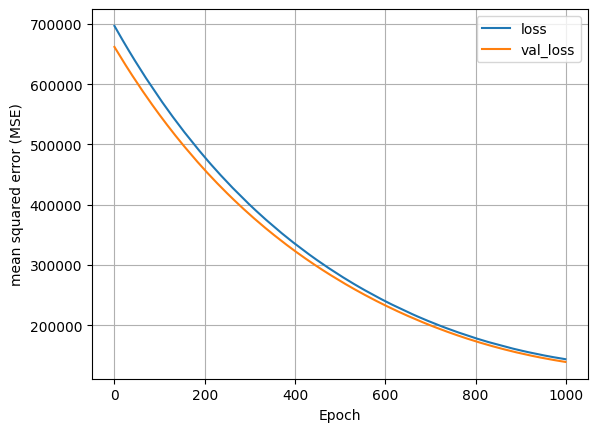

In [119]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


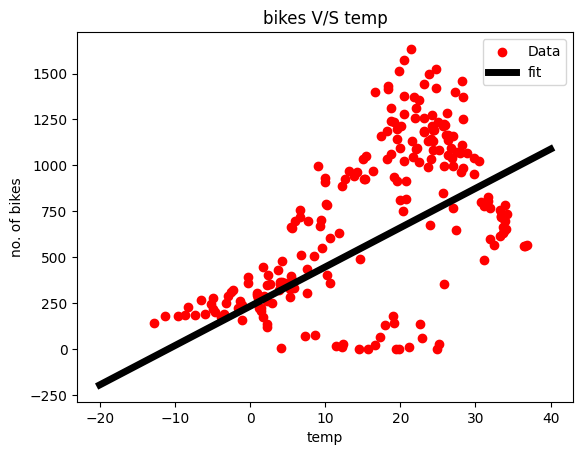

In [120]:
plt.scatter(x_train_temp,y_train_temp, label='Data',color='red')
x=tf.linspace(-20,40,100)  # x data ranges fro -20 to 40 and 100 data pts between them are taken
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label='fit', color='black', linewidth=5) #x is in 1-d we have to convert it into 2d by- np.array(x).reshape(-1,1)
plt.legend()
plt.title('bikes V/S temp')
plt.ylabel('no. of bikes')
plt.xlabel('temp')
plt.show()

#Regression with neural net and multiple nodes and Single variable

In [145]:
temp_nomralizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_nomralizer.adapt(x_train_temp.reshape(-1))


nn_model=tf.keras.Sequential([
    temp_nomralizer,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [146]:
history=nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
)

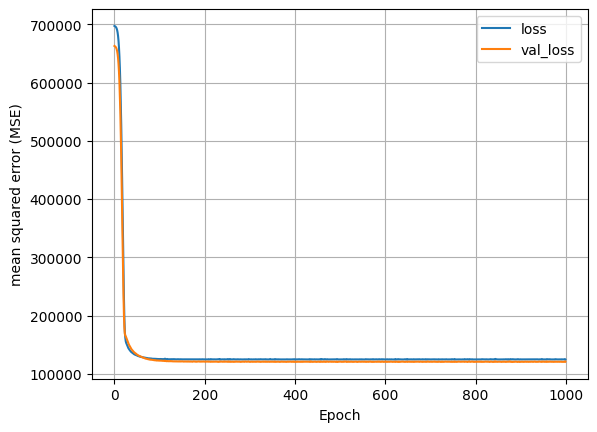

In [147]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


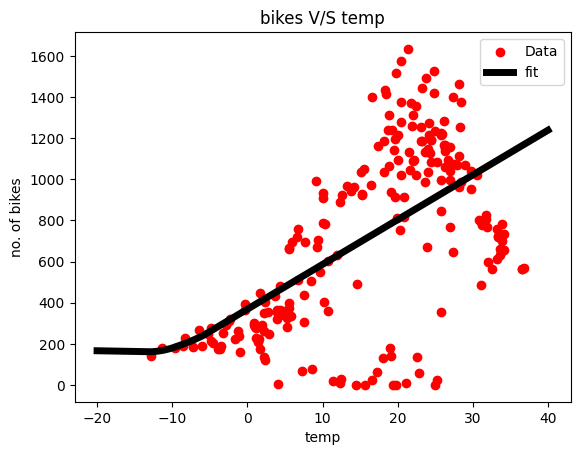

In [148]:
plt.scatter(x_train_temp,y_train_temp, label='Data',color='red')
x=tf.linspace(-20,40,100)  # x data ranges fro -20 to 40 and 100 data pts between them are taken
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label='fit', color='black', linewidth=5) #x is in 1-d we have to convert it into 2d by- np.array(x).reshape(-1,1)
plt.legend()
plt.title('bikes V/S temp')
plt.ylabel('no. of bikes')
plt.xlabel('temp')
plt.show()

#Regression with multiple variables and multiple nodes neural net

In [163]:
all_nomralizer= tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_nomralizer.adapt(x_train_all)

In [164]:
nn_model_all=tf.keras.Sequential([
    all_nomralizer,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

nn_model_all.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [165]:
history=nn_model_all.fit(
    x_train_all, y_train_all,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_all,y_val_all)
)

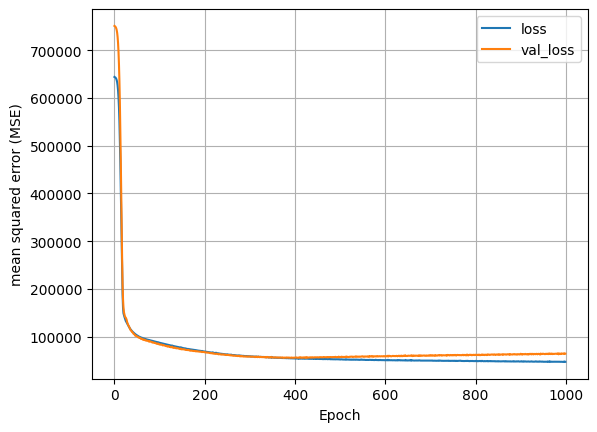

In [166]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


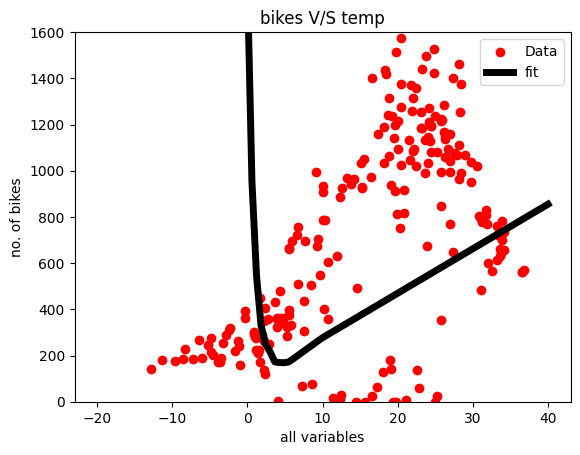

In [174]:
plt.scatter(x_train_temp,y_train_temp, label='Data',color='red')
x=tf.linspace(-20,40,100)  # x data ranges fro -20 to 40 and 100 data pts between them are taken
plt.plot(x,nn_model_all.predict(np.array(x).reshape(-1,1)), label='fit', color='black', linewidth=5) #x is in 1-d we have to convert it into 2d by- np.array(x).reshape(-1,1)
plt.legend()
lim=[0,1600]
plt.ylim(lim)
plt.title('bikes V/S temp')
plt.ylabel('no. of bikes')
plt.xlabel('all variables')
plt.show()

for 100000 Epochs:
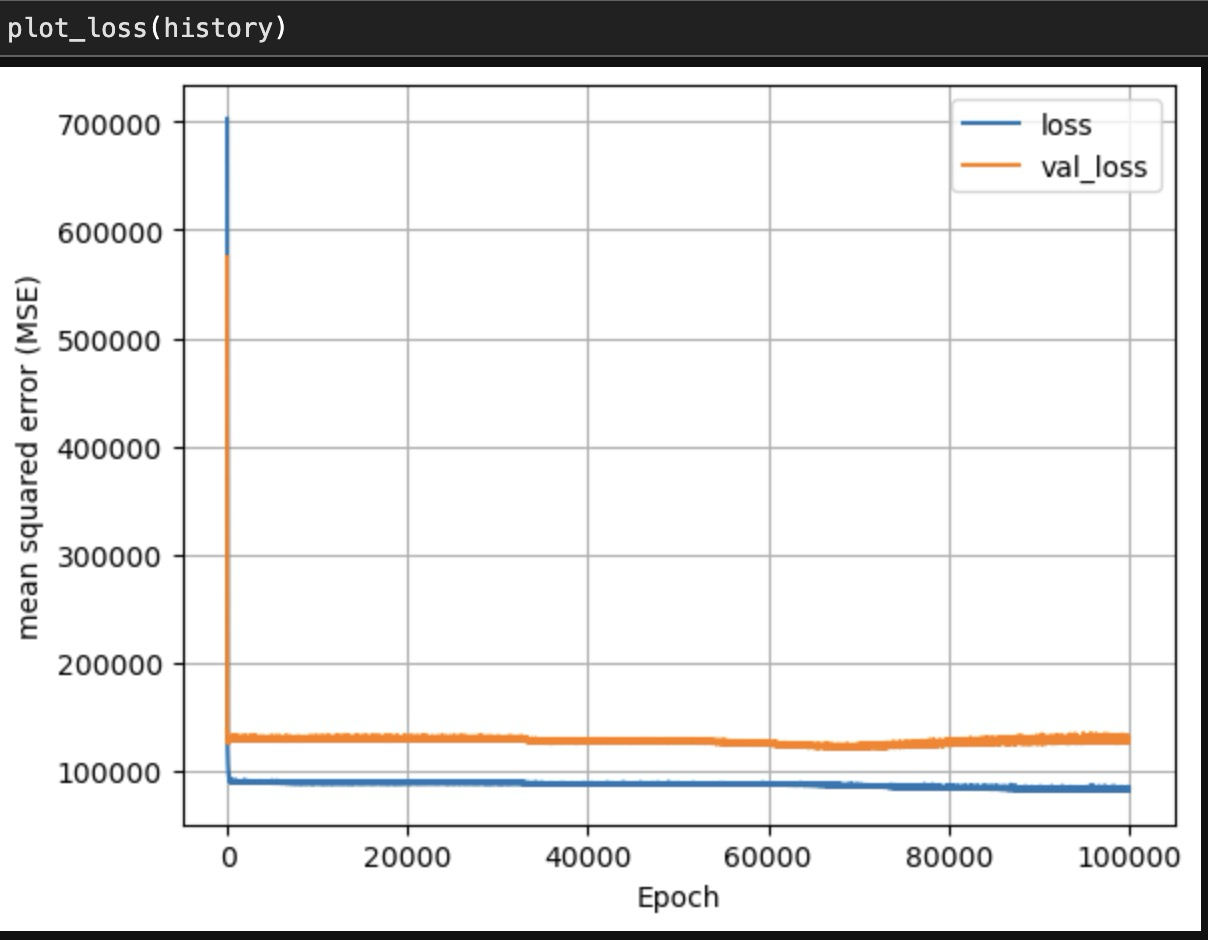

Bikes V/S all variables graph:

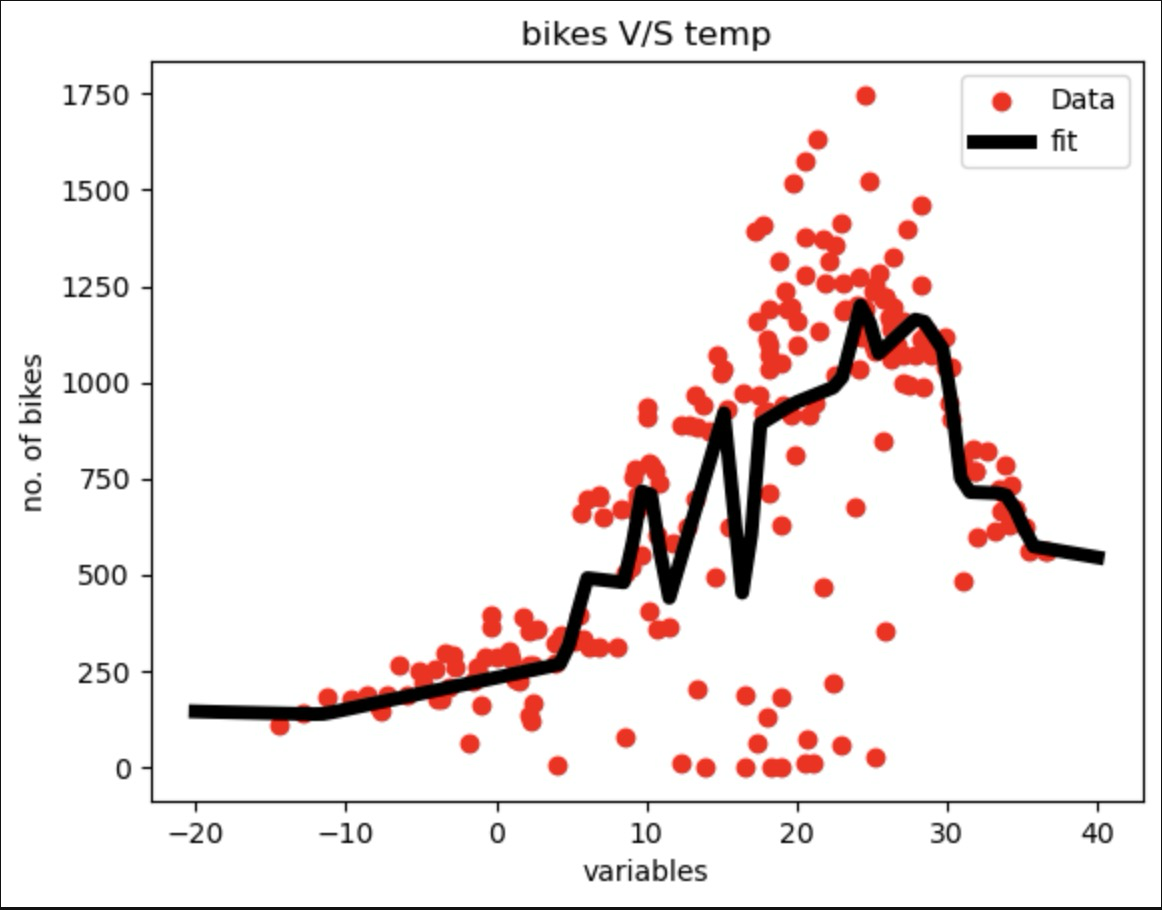



#Comparison of linear regression and nn (for multiple variables)

In [168]:
#calculates MSE for both linear regression and nn

y_pred_lin_reg=all_reg.predict(x_test_all)

y_pred_nn=nn_model_all.predict(x_test_all)


3/3 [==============================] - 0s 4ms/step


In [169]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()


In [170]:
MSE(y_pred_lin_reg,y_test_all)

103223.84710656483

In [171]:
MSE(y_pred_nn,y_test_all)

97941.33218934822

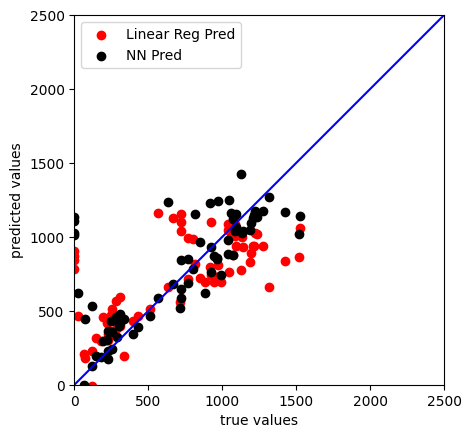

In [173]:
ax=plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lin_reg,label='Linear Reg Pred',color='red')
plt.scatter(y_test_all,y_pred_nn,label='NN Pred',color='black')
plt.xlabel('true values')
plt.ylabel('predicted values')
lim=[0,2500]
plt.legend()
plt.xlim(lim)
plt.ylim(lim)
_=plt.plot(lim,lim,c='blue')
